In [2]:
import pandas as pd
import dask.distributed as dd
import numpy as np
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier, CatBoostRegressor

In [3]:
winequality_red = pd.read_csv("data/winequality-red.csv", delimiter=";")
winequality_white = pd.read_csv("data/winequality-white.csv", delimiter=";")
winequality_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


So the goal here is to make a prediction of the quality. 

In [4]:
winequality_white.columns == winequality_red.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [5]:
winequality_white["White"] = 1
winequality_red["White"] = 0
df = pd.concat((winequality_red, winequality_white))
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,White
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


In [6]:
target = df["quality"]
df.drop(columns="quality", inplace=True)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,White
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,1
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1


In [7]:
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2)

In [8]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,White
497,6.8,0.230,0.32,1.60,0.026,43.0,147.0,0.99040,3.29,0.54,12.5,1
3100,6.7,0.140,0.51,4.30,0.028,57.0,124.0,0.99176,2.91,0.54,10.7,1
3468,6.6,0.160,0.36,1.10,0.031,27.0,93.0,0.98884,3.23,0.34,13.2,1
91,6.1,0.270,0.43,7.50,0.049,65.0,243.0,0.99570,3.12,0.47,9.0,1
4265,6.2,0.360,0.22,5.25,0.038,44.0,145.0,0.99184,3.22,0.40,11.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
457,7.1,0.210,0.27,8.60,0.056,26.0,111.0,0.99560,2.95,0.52,9.5,1
1813,7.2,0.150,0.38,1.20,0.038,18.0,110.0,0.99170,3.19,0.43,11.1,1
830,7.3,0.205,0.31,1.70,0.060,34.0,110.0,0.99630,3.72,0.69,10.5,1
4232,6.6,0.390,0.28,9.20,0.036,10.0,92.0,0.99206,3.07,0.35,12.1,1


In [9]:
categorical_features = np.where(df[list(df.columns)].dtypes != float)[0]
categorical_features

array([11])

In [10]:
params = {
    "iterations": 10000,
    "learning_rate": 0.005,
    "cat_features": categorical_features,
    "depth": 3,
}
cat_reg_model = CatBoostRegressor(**params)
cat_reg_model.fit(
    X_train, y_train, eval_set=(X_test, y_test), use_best_model=True, plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.8816594	test: 0.8335225	best: 0.8335225 (0)	total: 56.5ms	remaining: 9m 25s
1:	learn: 0.8806876	test: 0.8325941	best: 0.8325941 (1)	total: 57.3ms	remaining: 4m 46s
2:	learn: 0.8797359	test: 0.8315838	best: 0.8315838 (2)	total: 57.9ms	remaining: 3m 12s
3:	learn: 0.8787415	test: 0.8305687	best: 0.8305687 (3)	total: 58.5ms	remaining: 2m 26s
4:	learn: 0.8777339	test: 0.8295491	best: 0.8295491 (4)	total: 59.1ms	remaining: 1m 58s
5:	learn: 0.8767984	test: 0.8286077	best: 0.8286077 (5)	total: 59.8ms	remaining: 1m 39s
6:	learn: 0.8758769	test: 0.8276808	best: 0.8276808 (6)	total: 61.5ms	remaining: 1m 27s
7:	learn: 0.8749813	test: 0.8267641	best: 0.8267641 (7)	total: 63.7ms	remaining: 1m 19s
8:	learn: 0.8741277	test: 0.8259000	best: 0.8259000 (8)	total: 65.2ms	remaining: 1m 12s
9:	learn: 0.8731599	test: 0.8249240	best: 0.8249240 (9)	total: 65.8ms	remaining: 1m 5s
10:	learn: 0.8722580	test: 0.8239943	best: 0.8239943 (10)	total: 66.7ms	remaining: 1m
11:	learn: 0.8713985	test: 0.823173

In [11]:
import shap


from catboost import CatBoostClassifier, Pool

shap_Values = cat_reg_model.get_feature_importance(
    Pool(X_test, label=y_test, cat_features=categorical_features), type="ShapValues"
)

expected_value = shap_Values[0, -1]
shap_values = shap_Values[:, :-1]

shap.initjs()
shap.force_plot(expected_value, shap_values[0, :], X_test.iloc[0, :])

In [20]:
# a supp
np.shape(shap_Values), np.shape(shap_values)

((1300, 13), (1300, 12))

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


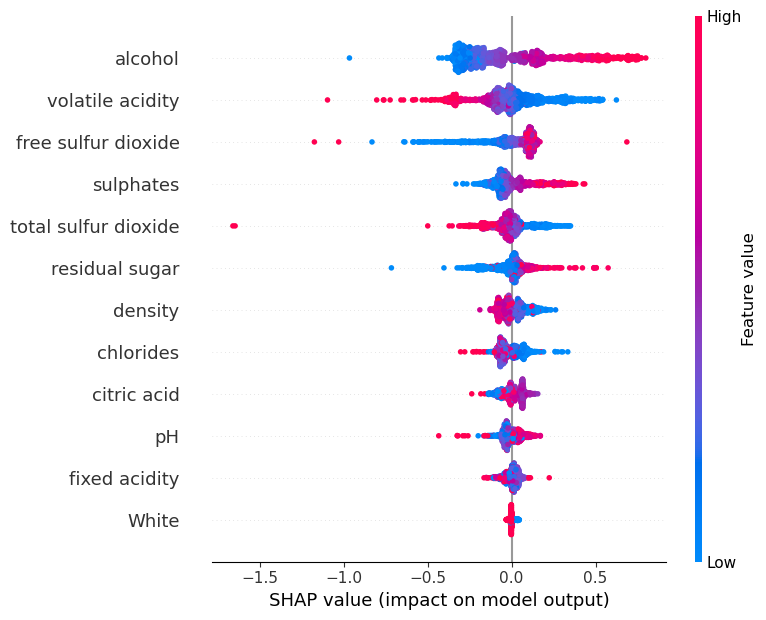

In [13]:
shap.summary_plot(shap_values, X_test)

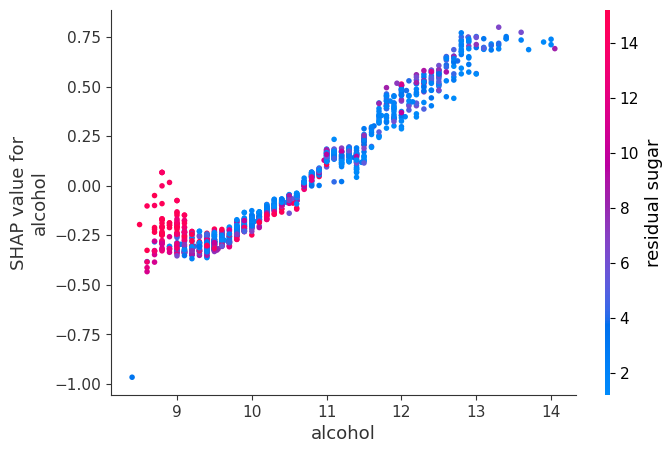

In [14]:
shap.dependence_plot("alcohol", shap_values, X_test)

In [15]:
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers.core import Dense, Activation, Dropout
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler = MinMaxScaler(feature_range=(0, 1))
X_train = scaler.fit_transform(X_train)
X_val = scaler.fit_transform(X_val)

NameError: name 'X_val' is not defined